In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading dataset
data = pd.read_csv('/content/student_admission_data.csv')

In [5]:
#First Five Rows fo the dataset
data.head()

Gender  Interview_Score  Competitive_Exam_Rank  Percentage   Sports  \
0  Other              3.1                   4351       95.27     Good   
1  Other              9.7                   1848       54.86      Bad   
2  Other              0.2                   1551       52.81  Average   
3  Other              2.1                   3546       67.15  Average   
4   Male              5.3                   1368       52.19     Good   

   Rewards_and_Penalties  Internships  Gap_Year  Disability_Accommodation  \
0                   10.0            0     False                     False   
1                    2.0            3     False                     False   
2                    0.0            1     False                      True   
3                    2.0            0      True                      True   
4                    7.0            1      True                     False   

   Competitive_Exam_Rank_Normalized  Communication_Skills_Score  \
0                          1.296519                         2.3   
1                          6.304522                         8.5   
2                          6.898760                         2.4   
3                          2.907163                         1.9   
4                          7.264906                         4.4   

   Peer_Review_Score  Teacher_Review_Score  Critical_Thinking_Score  \
0                4.1                  10.0                     10.0   
1                8.1                   9.9                     10.0   
2                4.8                   6.7                      8.9   
3                5.0                   9.0                      8.1   
4                6.3                   7.2                      9.0   

   No_of_Publications  Percentage_Normalized Admission_Status  
0                   3                  9.054               No  
1                   5                  0.972               No  
2                   5                  0.562               No  
3                   4                  3.430               No  
4                   5                  0.438               No

In [7]:
#Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Gender                            100000 non-null  object 
 1   Interview_Score                   100000 non-null  float64
 2   Competitive_Exam_Rank             100000 non-null  int64  
 3   Percentage                        100000 non-null  float64
 4   Sports                            100000 non-null  object 
 5   Rewards_and_Penalties             100000 non-null  float64
 6   Internships                       100000 non-null  int64  
 7   Gap_Year                          100000 non-null  bool   
 8   Disability_Accommodation          100000 non-null  bool   
 9   Competitive_Exam_Rank_Normalized  100000 non-null  float64
 10  Communication_Skills_Score        100000 non-null  float64
 11  Peer_Review_Score                 100000 non-null  fl

In [8]:
#Statistical Summary of the Numerical Features
data.describe()

Interview_Score  Competitive_Exam_Rank     Percentage  \
count    100000.000000          100000.000000  100000.000000   
mean          5.000027            2505.354270      74.953197   
std           2.883973            1442.217595      14.430039   
min           0.000000               1.000000      50.000000   
25%           2.500000            1263.000000      62.450000   
50%           5.000000            2505.000000      74.895000   
75%           7.500000            3751.250000      87.440000   
max          10.000000            4999.000000     100.000000   

       Rewards_and_Penalties    Internships  Competitive_Exam_Rank_Normalized  \
count          100000.000000  100000.000000                      1.000000e+05   
mean                3.826470       1.999300                      4.989287e+00   
std                 4.251023       1.414588                      2.885589e+00   
min                -5.000000       0.000000                     -1.776357e-15   
25%                 0.000000       1.000000                      2.496499e+00   
50%                 4.000000       2.000000                      4.989996e+00   
75%                 8.000000       3.000000                      7.474990e+00   
max                10.000000       4.000000                      1.000000e+01   

       Communication_Skills_Score  Peer_Review_Score  Teacher_Review_Score  \
count               100000.000000      100000.000000         100000.000000   
mean                     4.998159           5.000831              9.489071   
std                      2.197828           1.751593              0.849610   
min                      0.000000           0.200000              5.300000   
25%                      3.300000           3.800000              9.200000   
50%                      5.000000           5.000000             10.000000   
75%                      6.700000           6.200000             10.000000   
max                     10.000000           9.900000             10.000000   

       Critical_Thinking_Score  No_of_Publications  Percentage_Normalized  
count            100000.000000       100000.000000          100000.000000  
mean                  9.585004            4.505500               4.990639  
std                   0.929486            1.005445               2.886008  
min                   5.000000            0.000000               0.000000  
25%                  10.000000            5.000000               2.490000  
50%                  10.000000            5.000000               4.979000  
75%                  10.000000            5.000000               7.488000  
max                  10.000000            5.000000              10.000000

In [9]:
print("Categorical Features Distribution:")
print(data['Gender'].value_counts())
print(data['Sports'].value_counts())
print(data['Admission_Status'].value_counts())
print(data['Gap_Year'].value_counts())
print(data['Disability_Accommodation'].value_counts())

Categorical Features Distribution:
Gender
Other     33588
Male      33363
Female    33049
Name: count, dtype: int64
Sports
Average    33376
Bad        33315
Good       33309
Name: count, dtype: int64
Admission_Status
No     99186
Yes      814
Name: count, dtype: int64
Gap_Year
False    50149
True     49851
Name: count, dtype: int64
Disability_Accommodation
False    50002
True     49998
Name: count, dtype: int64


In [25]:
numerical_features = data.select_dtypes(include=['int64','float64'])
print(numeical_features.columns)

Index(['Interview_Score', 'Competitive_Exam_Rank', 'Percentage',
       'Rewards_and_Penalties', 'Internships',
       'Competitive_Exam_Rank_Normalized', 'Communication_Skills_Score',
       'Peer_Review_Score', 'Teacher_Review_Score', 'Critical_Thinking_Score',
       'No_of_Publications', 'Percentage_Normalized'],
      dtype='object')


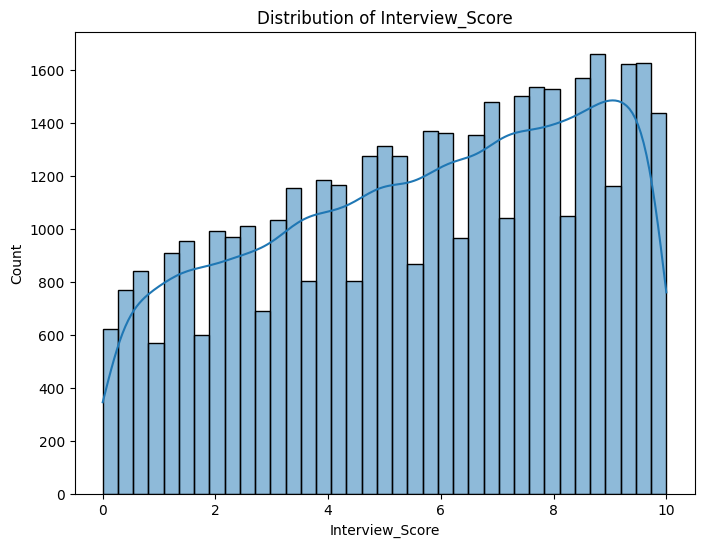

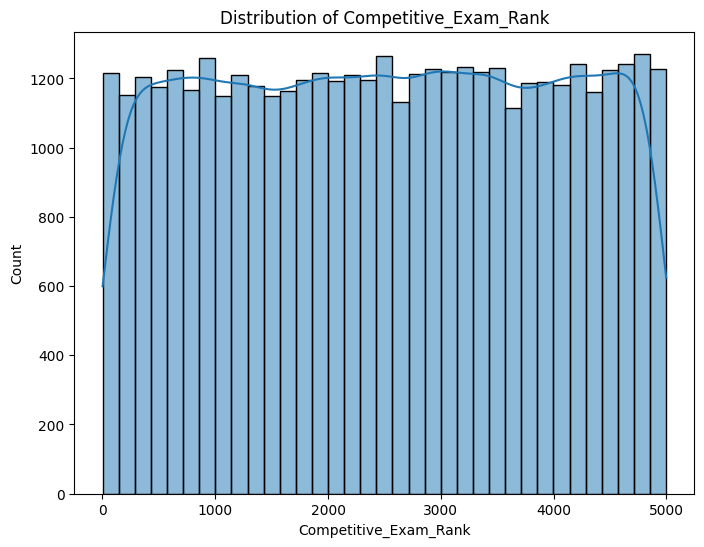

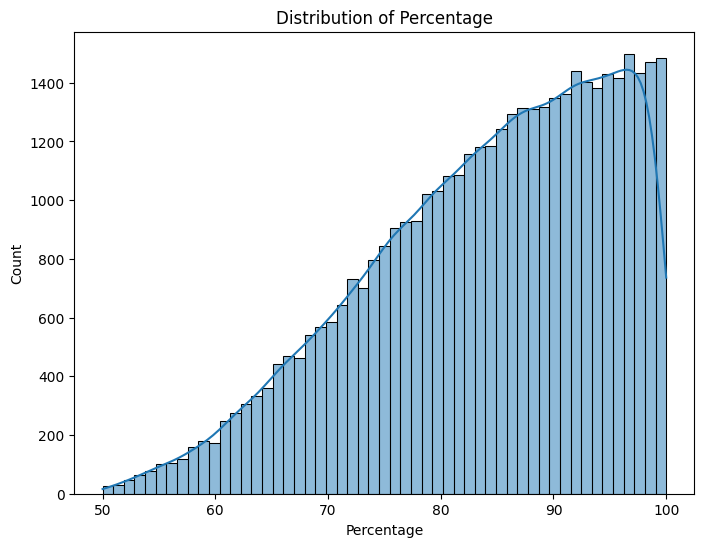

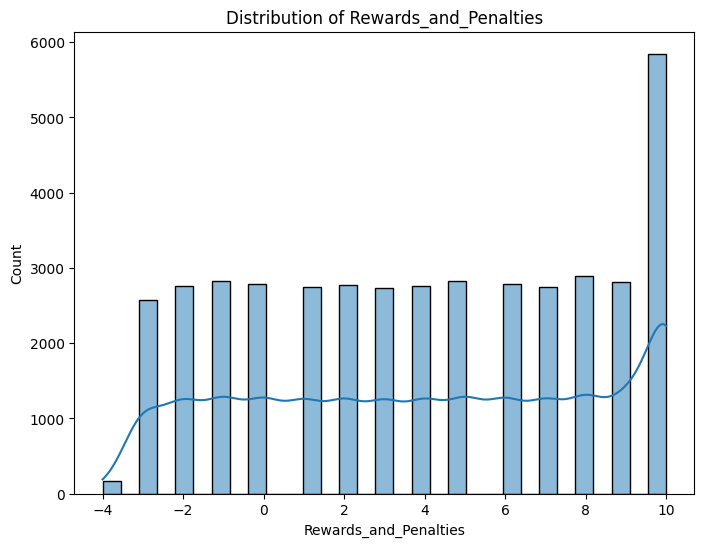

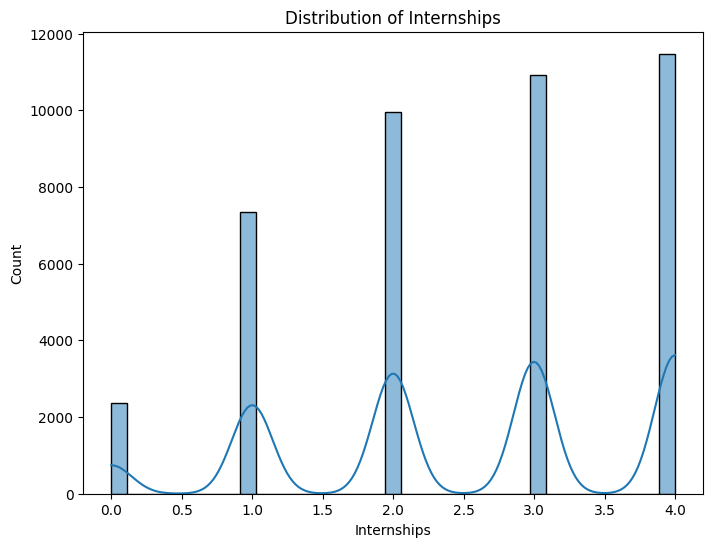

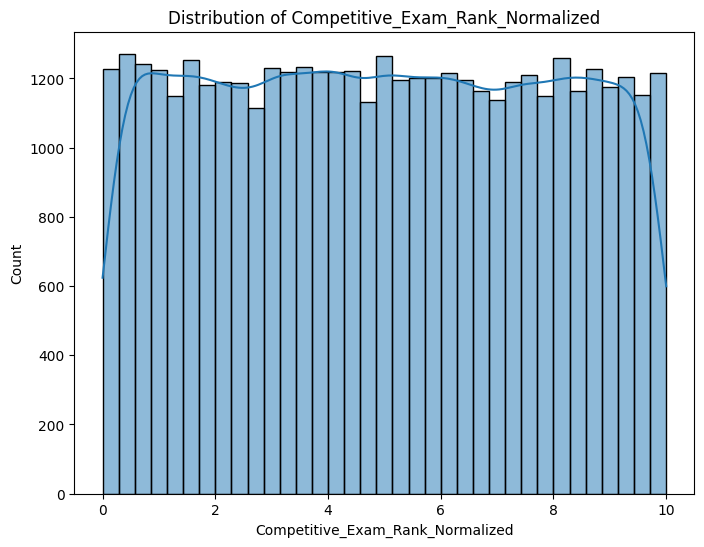

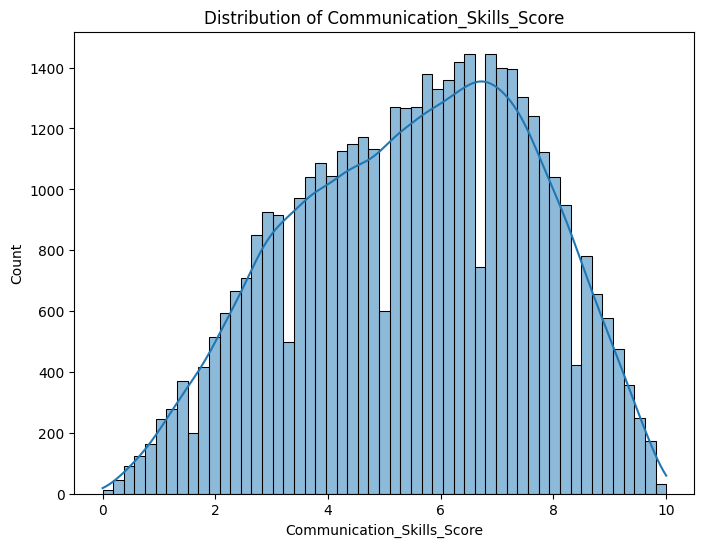

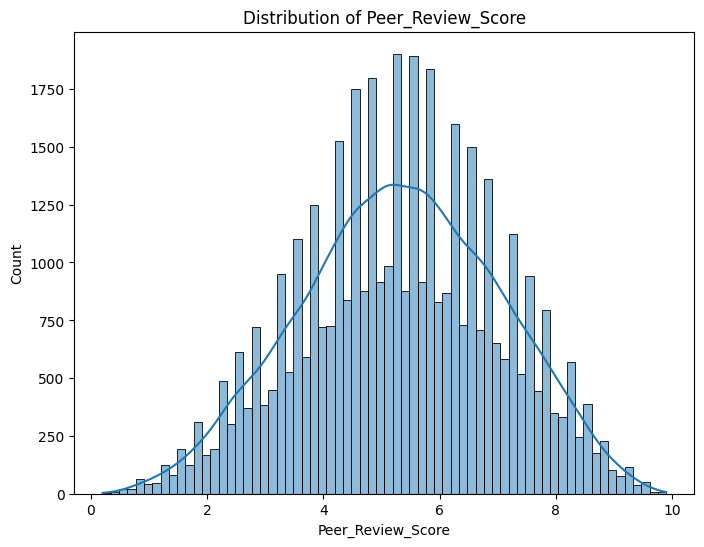

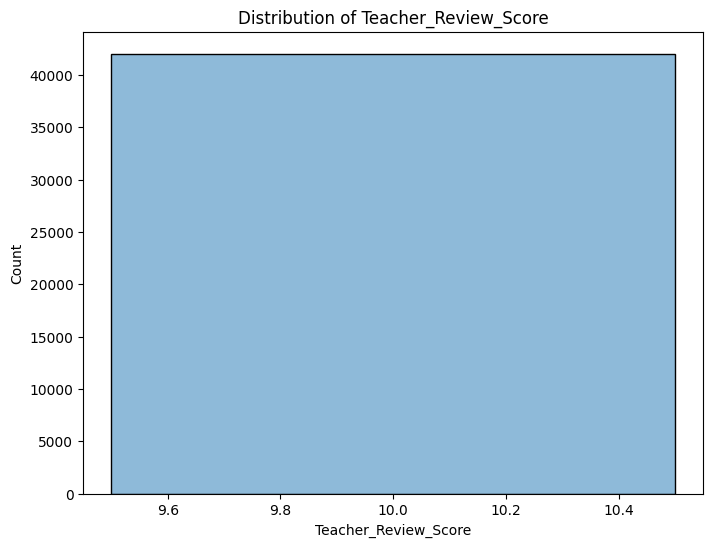

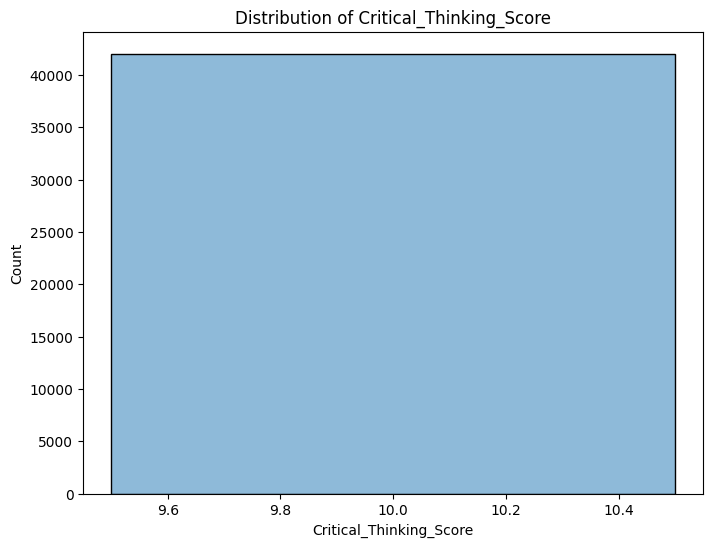

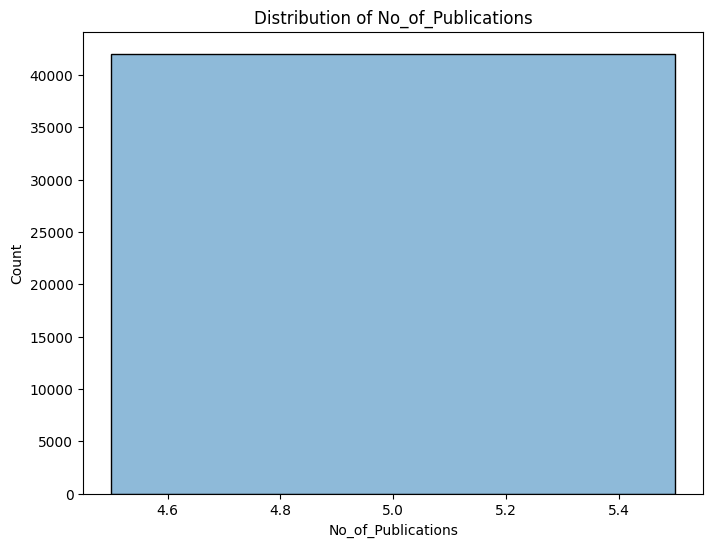

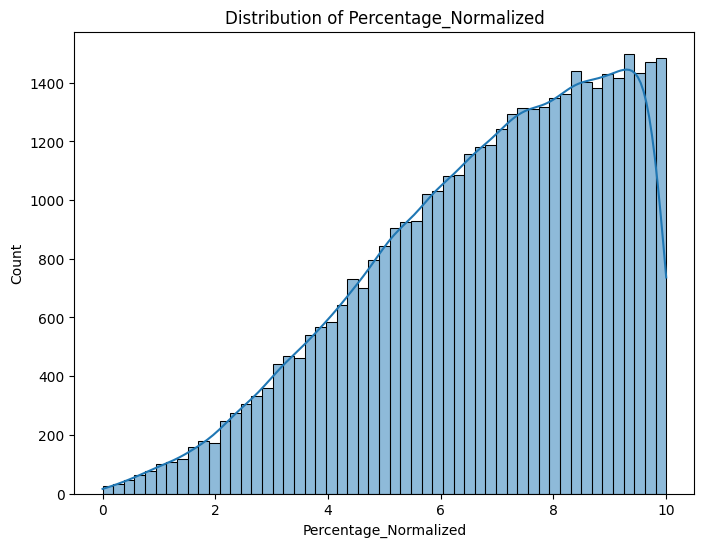

In [26]:
for col in numerical_features.columns:
  plt.figure(figsize = (8,6))
  sns.histplot(data[col],kde = True)
  plt.title(f'Distribution of {col}')
  plt.show()

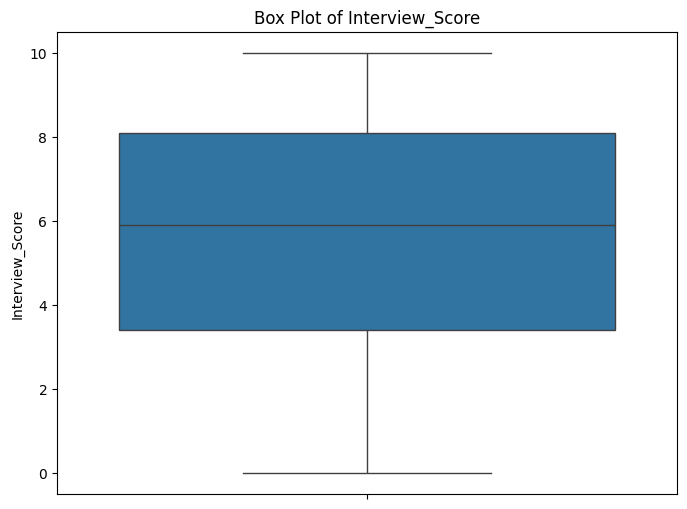

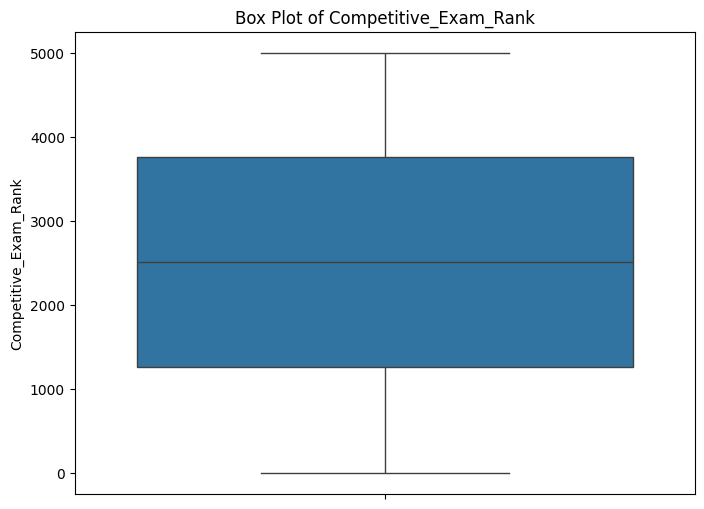

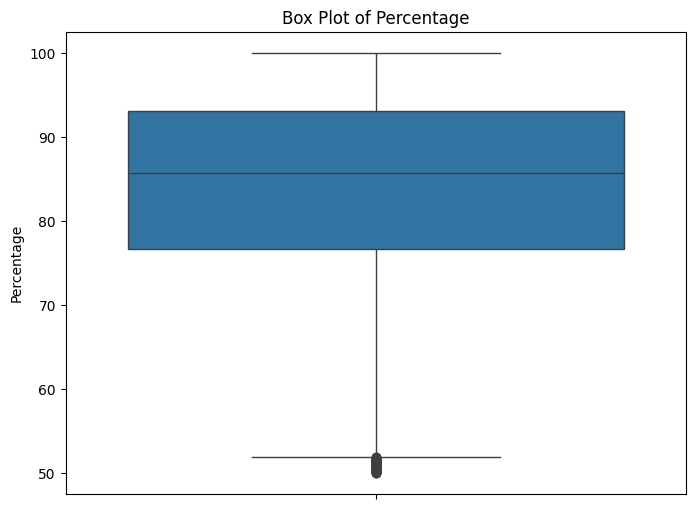

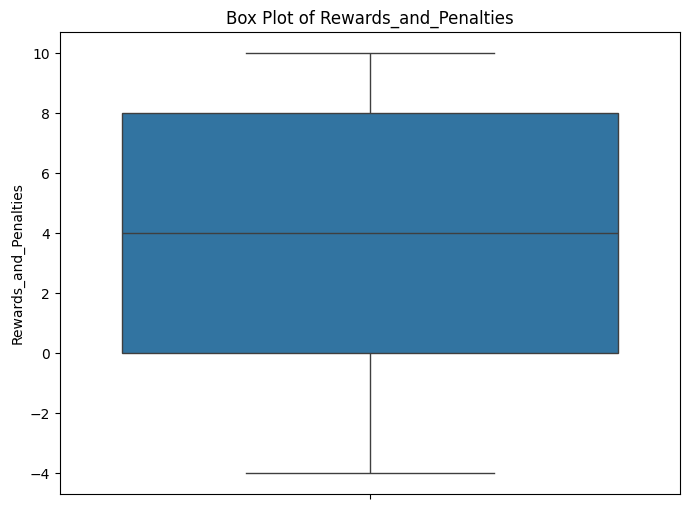

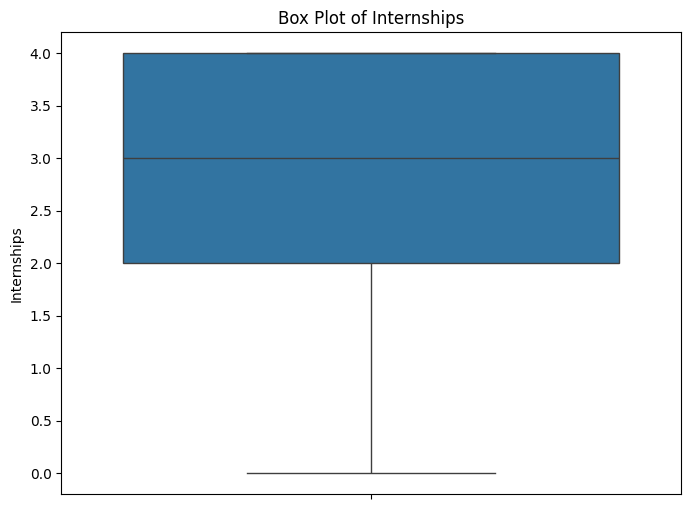

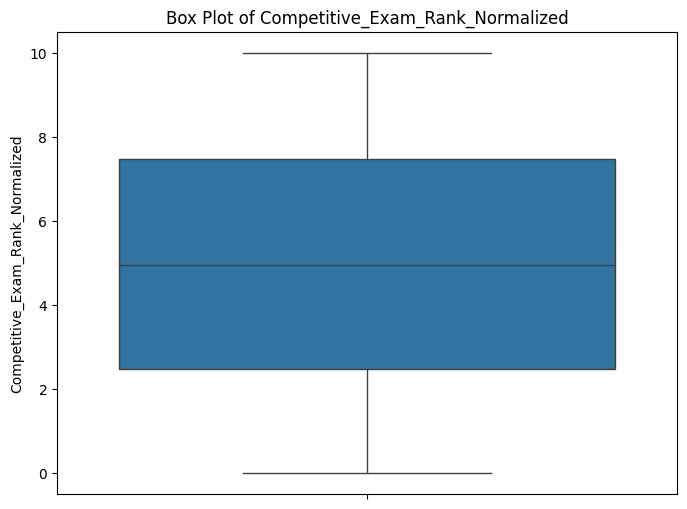

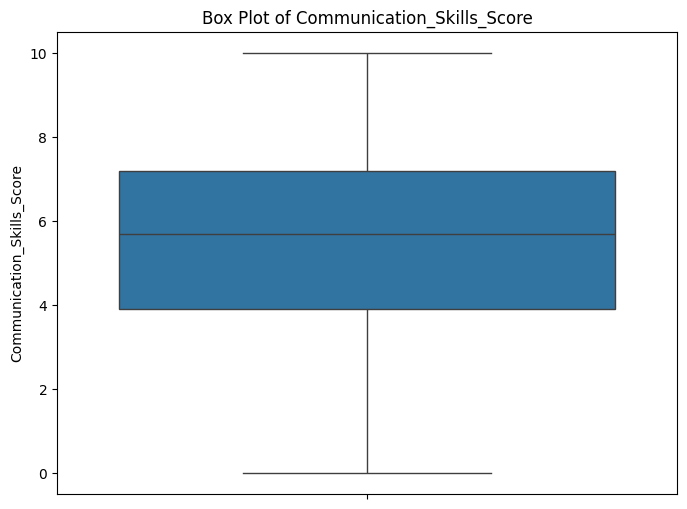

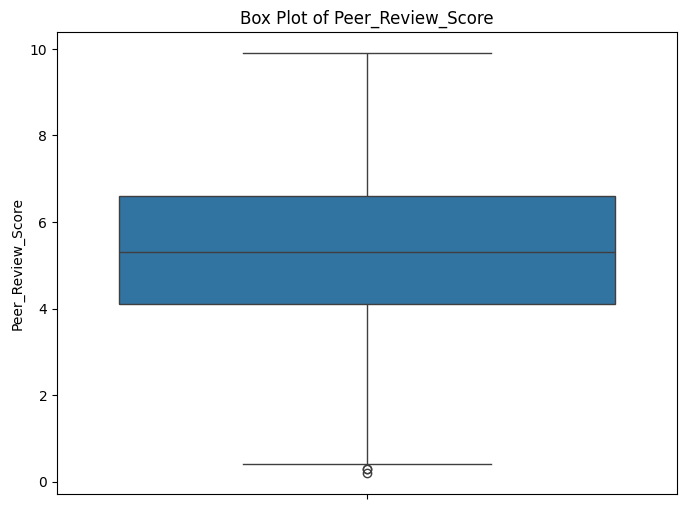

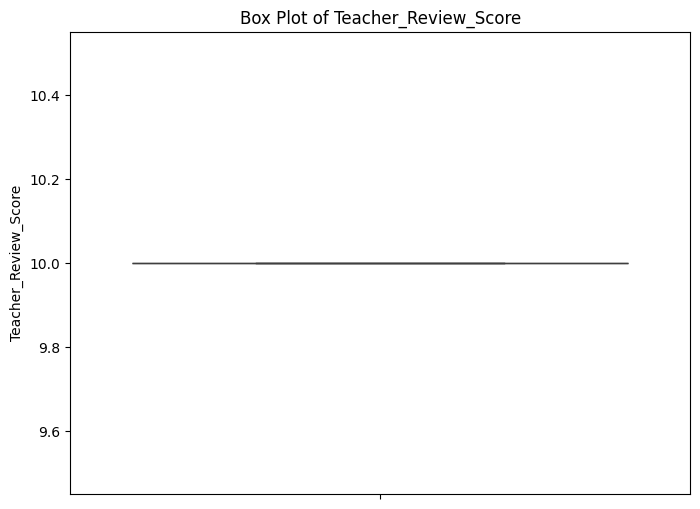

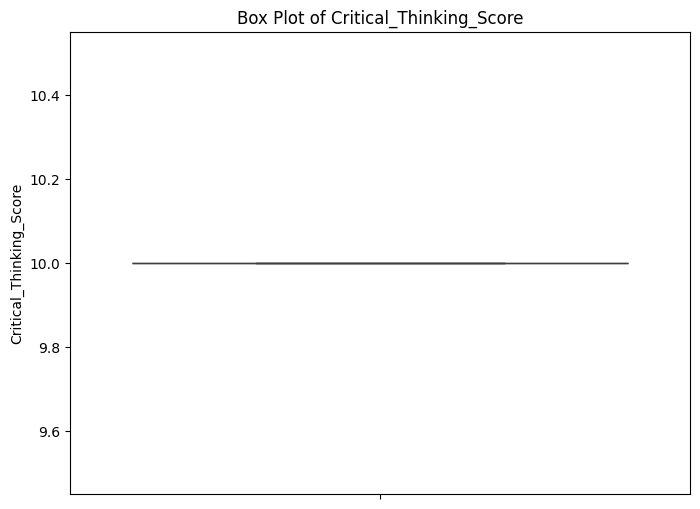

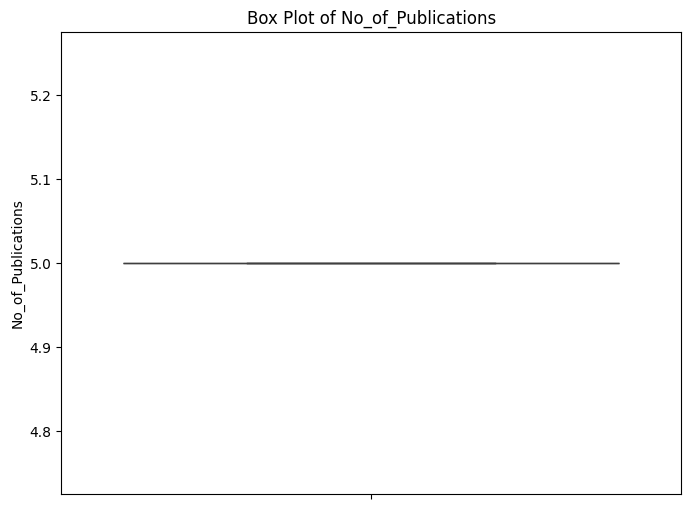

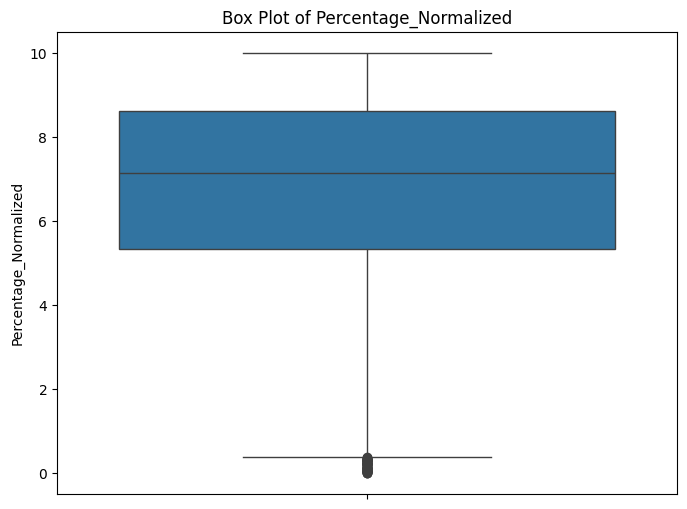

In [27]:
#Box plot fpr detecting Outliers
for col in numerical_features.columns:
  plt.figure(figsize = (8,6))
  sns.boxplot(data[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

In [18]:
#Removing outliers from the columns
Q1_publications = data['No_of_Publications'].quantile(0.25)
Q3_publications = data['No_of_Publications'].quantile(0.75)
IQR_publications = Q3_publications - Q1_publications

Q1_critical_thinking = data['Critical_Thinking_Score'].quantile(0.25)
Q3_critical_thinking = data['Critical_Thinking_Score'].quantile(0.75)
IQR_critical_thinking = Q3_critical_thinking - Q1_critical_thinking

Q1_teacher_review = data['Teacher_Review_Score'].quantile(0.25)
Q3_teacher_review = data['Teacher_Review_Score'].quantile(0.75)
IQR_teacher_review = Q3_teacher_review - Q1_teacher_review


# Define the upper and lower bounds for outliers
lower_bound_publications = Q1_publications - 1.5 * IQR_publications
upper_bound_publications = Q3_publications + 1.5 * IQR_publications

lower_bound_critical_thinking = Q1_critical_thinking - 1.5 * IQR_critical_thinking
upper_bound_critical_thinking = Q3_critical_thinking + 1.5 * IQR_critical_thinking

lower_bound_teacher_review = Q1_teacher_review - 1.5 * IQR_teacher_review
upper_bound_teacher_review = Q3_teacher_review + 1.5 * IQR_teacher_review

data = data[(data['No_of_Publications'] >= lower_bound_publications) & (data['No_of_Publications'] <= upper_bound_publications)]
data = data[(data['Critical_Thinking_Score'] >= lower_bound_critical_thinking) & (data['Critical_Thinking_Score'] <= upper_bound_critical_thinking)]
data = data[(data['Teacher_Review_Score'] >= lower_bound_teacher_review) & (data['Teacher_Review_Score'] <= upper_bound_teacher_review)]


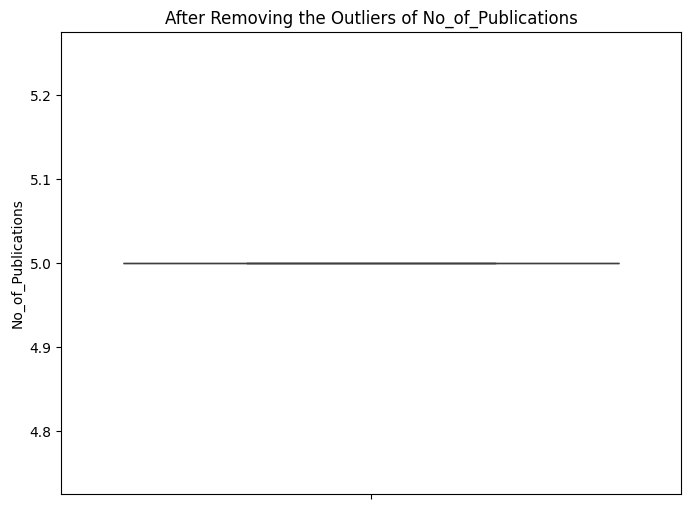

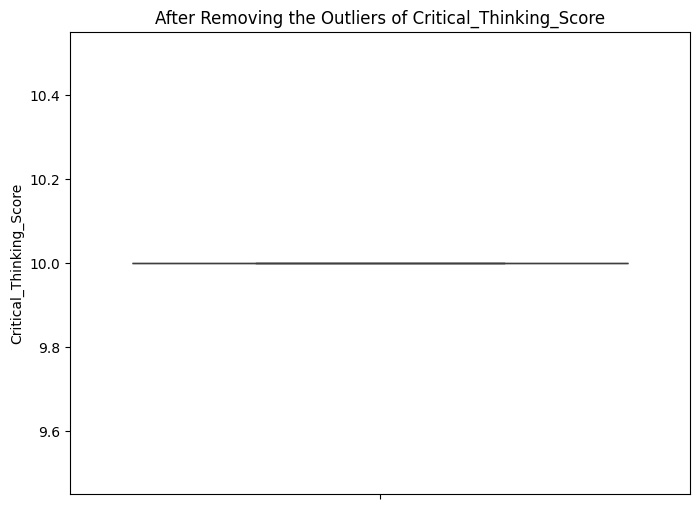

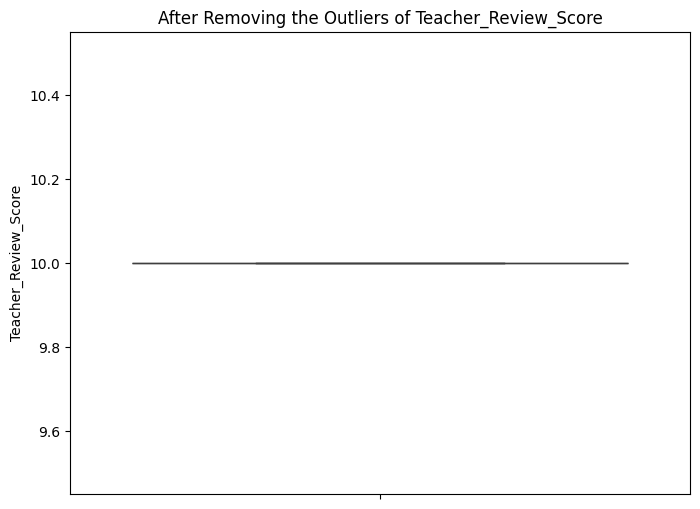

In [20]:
cols = ['No_of_Publications','Critical_Thinking_Score','Teacher_Review_Score']
for col in cols:
  plt.figure(figsize=(8,6))
  sns.boxplot(data[col])
  plt.title(f'After Removing the Outliers of {col}')
  plt.show()

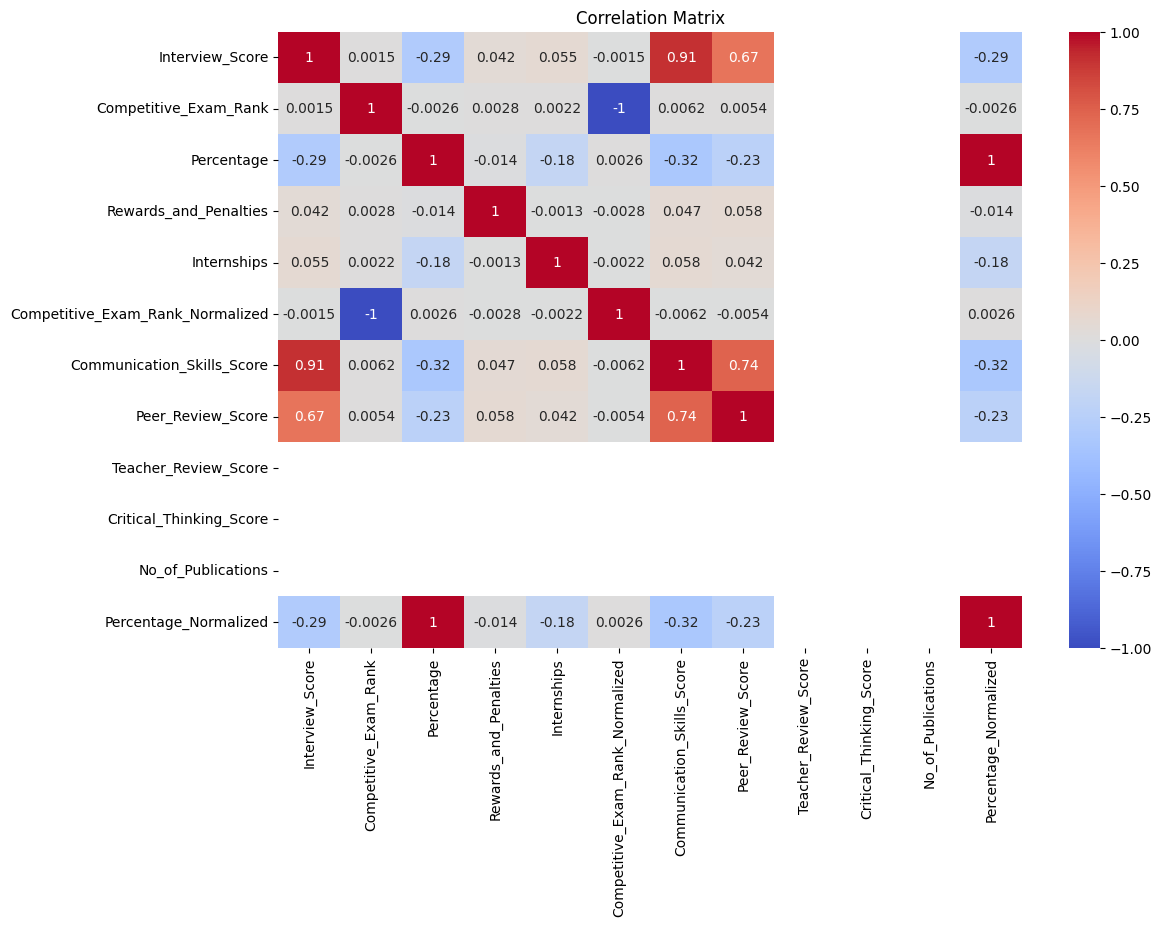

In [28]:
#Correlation Matrix
plt.figure(figsize = (12,8))
corr_mat = data[numerical_features.columns].corr()
sns.heatmap(corr_mat,annot = True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1200x800 with 0 Axes>

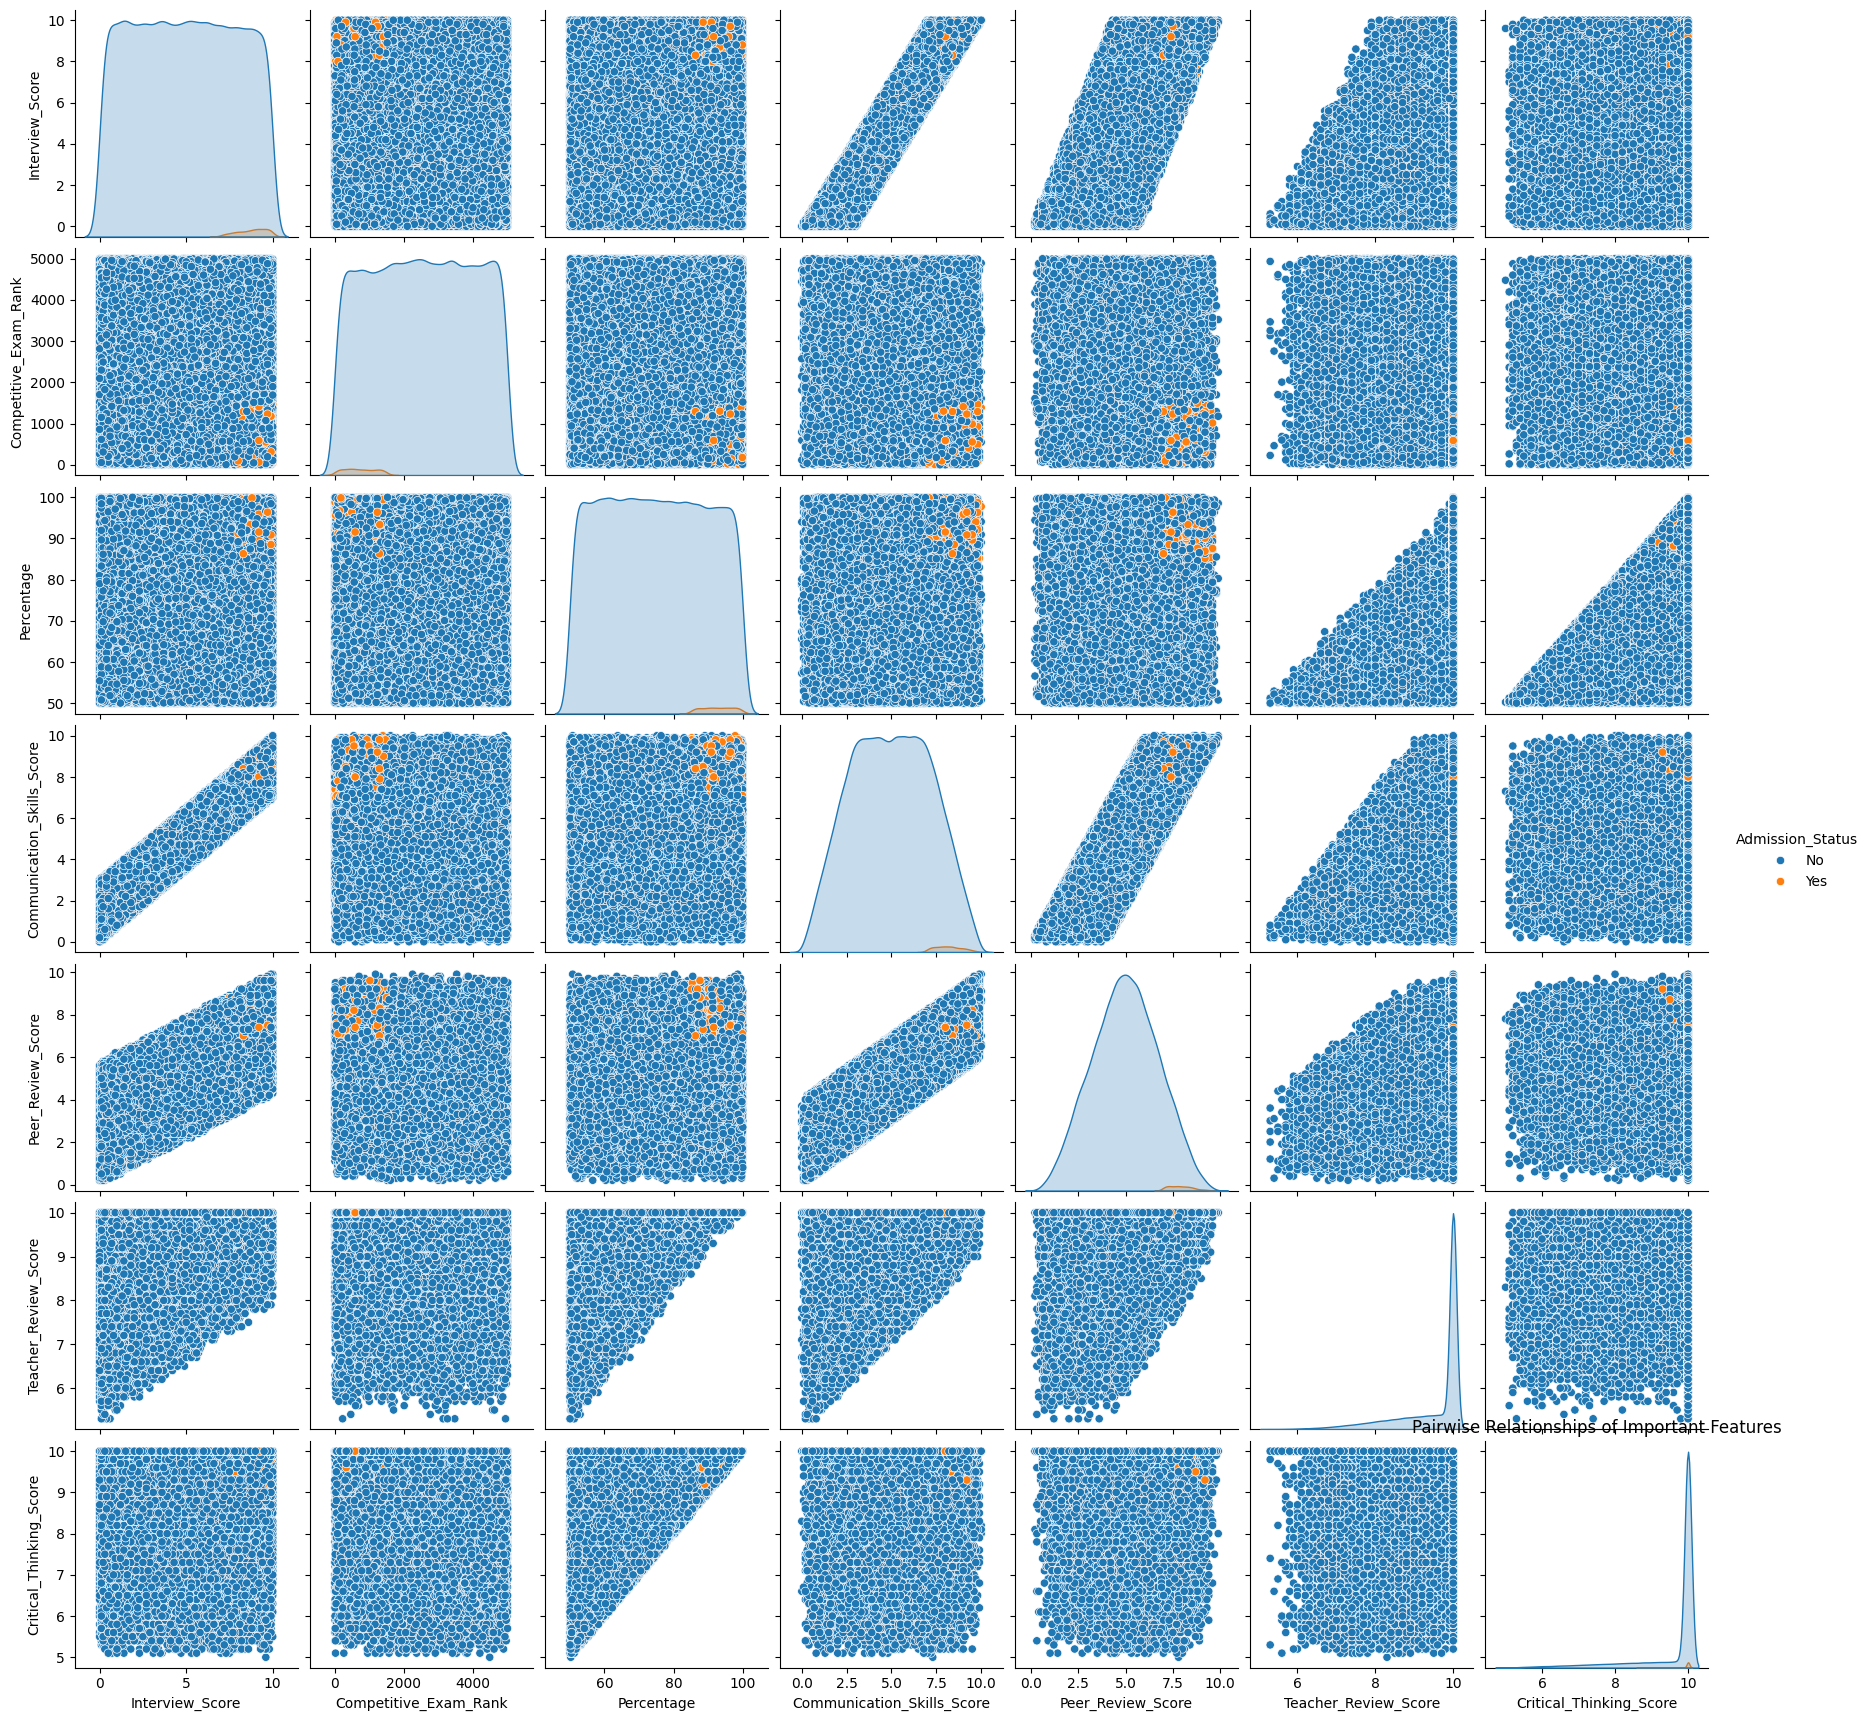

In [29]:
# Pairwise Relationships

plt.figure(figsize=(12, 8))
sns.pairplot(df[['Interview_Score', 'Competitive_Exam_Rank', 'Percentage',
                 'Communication_Skills_Score', 'Peer_Review_Score', 'Teacher_Review_Score',
                 'Critical_Thinking_Score', 'Admission_Status']], hue='Admission_Status')
plt.title('Pairwise Relationships of Important Features')
plt.show()


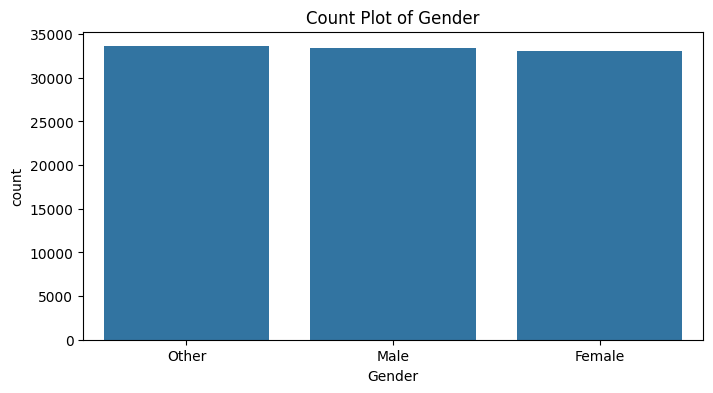

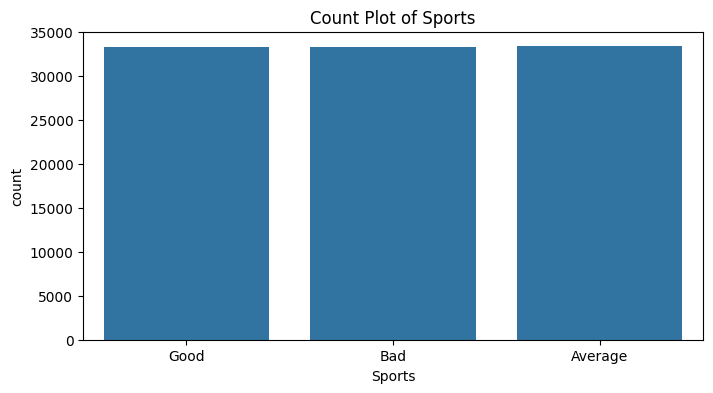

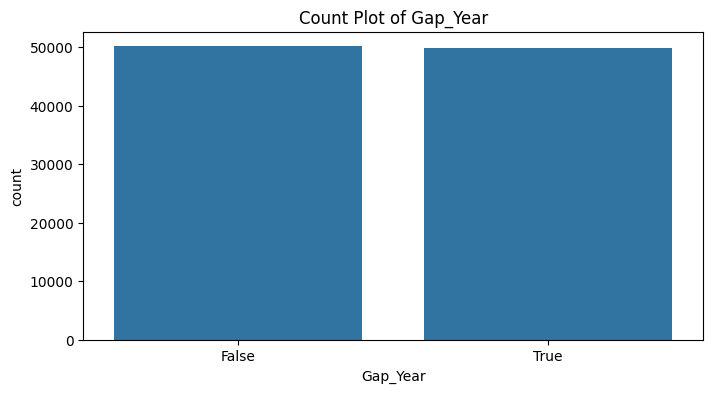

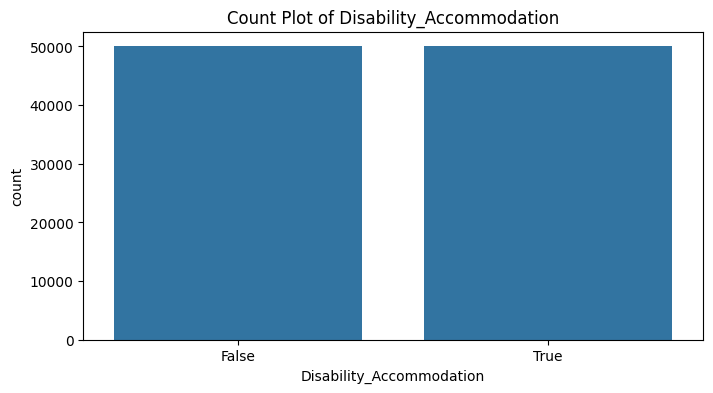

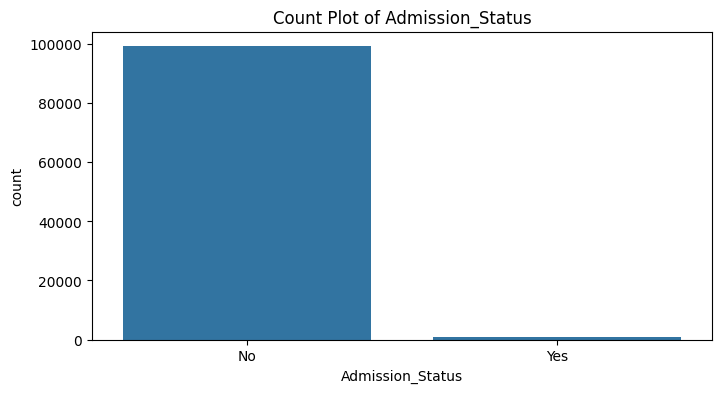

In [30]:
# Count plots for categorical features
categorical_columns = ['Gender', 'Sports', 'Gap_Year', 'Disability_Accommodation', 'Admission_Status']

for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot of {column}')
    plt.show()

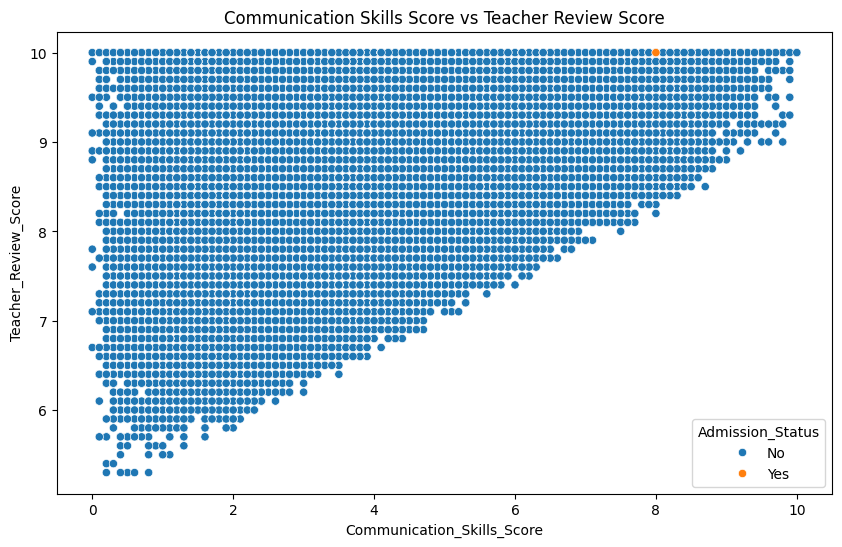

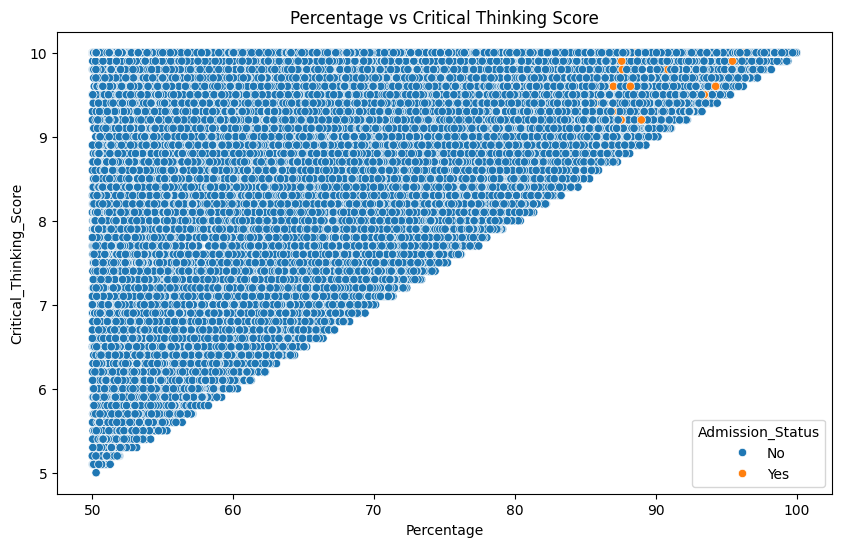

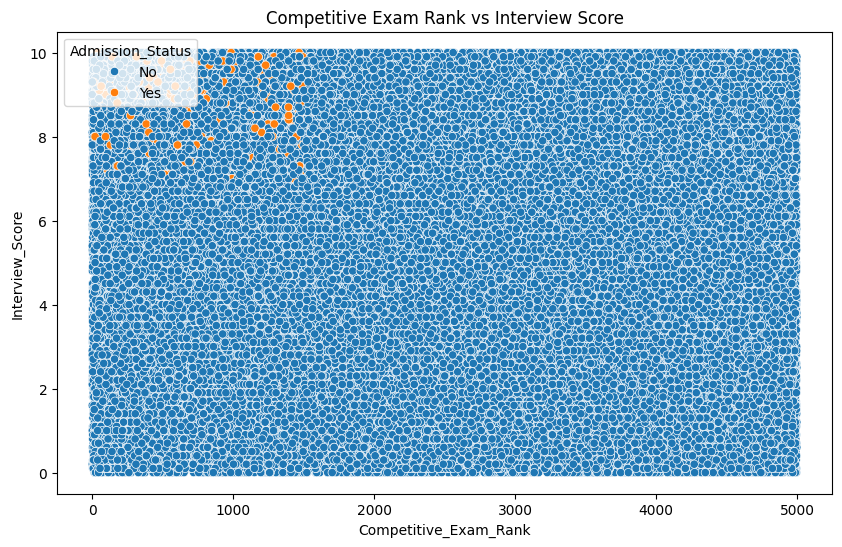

In [31]:
# Analyzing relationships between features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Communication_Skills_Score', y='Teacher_Review_Score', hue='Admission_Status')
plt.title('Communication Skills Score vs Teacher Review Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Percentage', y='Critical_Thinking_Score', hue='Admission_Status')
plt.title('Percentage vs Critical Thinking Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Competitive_Exam_Rank', y='Interview_Score', hue='Admission_Status')
plt.title('Competitive Exam Rank vs Interview Score')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Encode categorical features
label_encoders = {}
categorical_columns = ['Gender', 'Sports', 'Gap_Year', 'Disability_Accommodation', 'Admission_Status']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [37]:
# Separate features and target variable
X = df.drop(columns=['Admission_Status'])  # Features
y = df['Admission_Status']  # Target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
#Apply RandomForest ALgorithm
model = RandomForestClassifier(random_state=42)

model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19830
           1       1.00      0.99      0.99       170

    accuracy                           1.00     20000
   macro avg       1.00      0.99      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Confusion Matrix:
[[19830     0]
 [    2   168]]
ROC AUC Score: 1.0000



Feature Importance:
                             Feature  Importance
11                 Peer_Review_Score    0.268591
3                         Percentage    0.146175
10        Communication_Skills_Score    0.136308
15             Percentage_Normalized    0.135471
9   Competitive_Exam_Rank_Normalized    0.109583
2              Competitive_Exam_Rank    0.106390
1                    Interview_Score    0.067149
5              Rewards_and_Penalties    0.006617
13           Critical_Thinking_Score    0.006544
12              Teacher_Review_Score    0.004941
6                        Internships    0.004515
4                             Sports    0.001919
0                             Gender    0.001859
14                No_of_Publications    0.001651
8           Disability_Accommodation    0.001310
7                           Gap_Year    0.000977


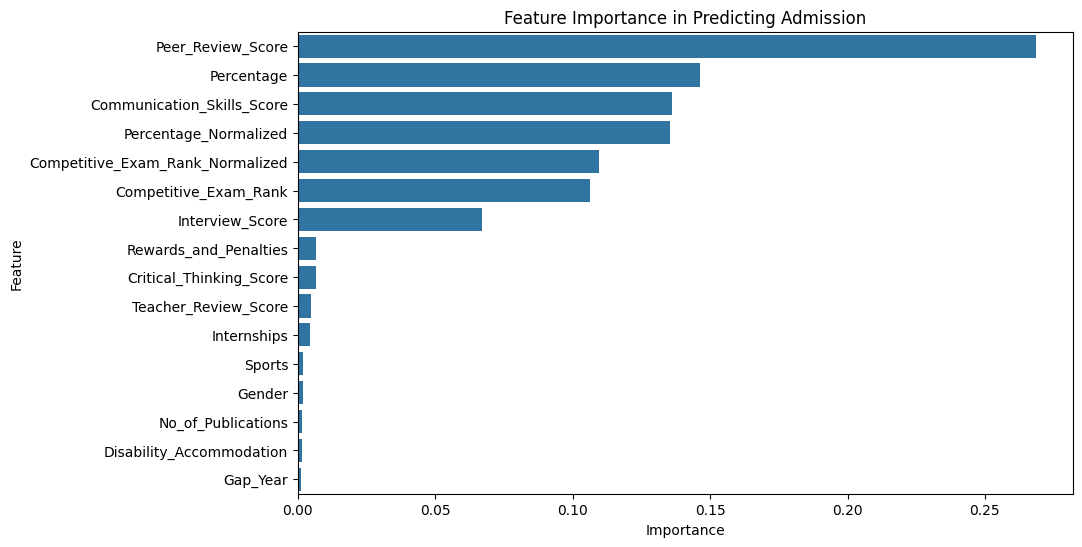

In [41]:
# Feature Importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Admission')
plt.show()